In [107]:
# mount drive to access data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [109]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Raw Data/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [110]:
# assign features matrix and target vector
y = df['PRICE']
X = df.drop(columns = 'PRICE')
# split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

First we will attempt to improve our model using bagged trees.

In [111]:
# instantiate model
bagreg = BaggingRegressor(random_state = 42)

In [112]:
# train the model
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [113]:
# predict values for y
bagreg.predict(X_test)

array([24.04, 30.77, 18.39, 24.04, 16.09, 20.4 , 19.13, 15.03, 21.07,
       21.39, 18.87, 19.46,  7.68, 19.44, 18.93, 25.27, 19.06,  7.87,
       44.92, 14.98, 24.01, 23.58, 14.26, 24.63, 14.15, 12.82, 20.67,
       14.2 , 19.37, 20.33, 20.6 , 23.18, 31.23, 21.4 , 13.94, 15.81,
       36.2 , 19.6 , 20.22, 24.6 , 18.88, 25.75, 44.15, 20.44, 22.72,
       14.5 , 14.95, 24.43, 16.76, 28.32, 22.93, 34.44, 15.92, 25.6 ,
       47.42, 22.56, 15.93, 31.44, 21.34, 20.25, 27.03, 33.4 , 27.06,
       19.23, 28.11, 16.18, 14.58, 22.82, 28.31, 16.5 , 19.59, 25.86,
        9.79, 21.71, 21.47,  6.94, 20.52, 46.12, 11.9 , 14.74, 20.45,
       11.14, 20.37,  9.44, 20.4 , 26.58, 16.95, 23.41, 24.52, 17.98,
       23.  ,  7.34, 18.97, 20.09, 26.26, 20.12, 35.89, 11.42, 12.12,
       12.27, 20.1 , 23.  , 11.72, 23.22, 20.29, 15.51, 18.07, 25.05,
       21.62, 23.58,  7.73, 14.05, 21.61, 22.51, 33.87, 12.38, 43.51,
       16.17, 18.67, 24.28, 20.11, 24.72,  8.68, 20.84, 24.5 , 21.74,
       24.2 ])

In [114]:
# evaluate model performance
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print('Training R2: ', bagreg_train_score)
print('Test R2: ', bagreg_test_score)

Training R2:  0.9606756023782893
Test R2:  0.8204208271364619


We will edit hyperparameters in an effort to obtain better results.

In [143]:
oneseventyfive_est = BaggingRegressor(n_estimators = 175, random_state = 42)

In [144]:
oneseventyfive_est.fit(X_train, y_train)

BaggingRegressor(n_estimators=175, random_state=42)

In [145]:
oneseventyfive_est.predict(X_test)

array([23.13885714, 32.15885714, 18.568     , 23.04571429, 16.17485714,
       20.75314286, 18.78742857, 15.21771429, 21.14      , 21.13314286,
       20.072     , 20.24628571,  8.18685714, 21.42342857, 19.61657143,
       26.54914286, 19.46457143,  8.47885714, 46.14171429, 15.07428571,
       23.68571429, 23.548     , 14.484     , 23.68114286, 15.05714286,
       13.59714286, 21.204     , 14.19771429, 18.90171429, 21.15885714,
       20.028     , 23.34971429, 28.51771429, 21.58685714, 14.21028571,
       16.02514286, 34.94971429, 19.20457143, 20.60228571, 23.88457143,
       18.83314286, 28.06514286, 45.35314286, 20.00057143, 22.84228571,
       14.10971429, 15.08914286, 23.784     , 17.77828571, 28.23085714,
       21.91085714, 34.09371429, 16.22      , 26.16571429, 45.06457143,
       22.04228571, 16.04971429, 32.42914286, 22.14571429, 20.712     ,
       26.36685714, 33.65142857, 30.70114286, 19.83085714, 27.43828571,
       16.26914286, 14.88057143, 22.93371429, 27.89485714, 16.75

In [146]:
new_est_train = oneseventyfive_est.score(X_train, y_train)
new_est_test = oneseventyfive_est.score(X_test, y_test)
print('Training R2: ', new_est_train)
print('Test R2: ', new_est_test)

Training R2:  0.9765560621620677
Test R2:  0.8376530781385059


In [119]:
est_range = list(range(2,300))
r2 = []
for est in est_range:
  baggedreg = BaggingRegressor(n_estimators = est, random_state = 42)
  baggedreg.fit(X_train, y_train)
  score = baggedreg.score(X_test, y_test)
  r2.append(score)

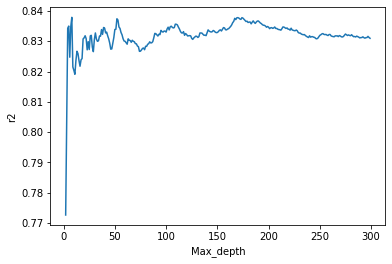

In [120]:
plt.plot(est_range, r2)
plt.xlabel('Max_depth')
plt.ylabel('r2');

The original Decision Tree Regression had an r2 of 0.8464 on the testing data.  We are not able to improve the results using bagged trees.

Now we will attempt to improve our model using Random Forest Regression.

In [148]:
# instantiate model
rf = RandomForestRegressor(random_state = 42)

In [149]:
# train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [150]:
# see scores for default Random Forest
rftrain_score = rf.score(X_train, y_train)
rftest_score = rf.score(X_test, y_test)
print(rftrain_score)
print(rftest_score)

0.9771342521069045
0.8338530730048258


In [151]:
# view depths
[estimator.get_depth() for estimator in rf.estimators_]

[19,
 17,
 18,
 18,
 17,
 17,
 19,
 17,
 16,
 17,
 19,
 18,
 18,
 16,
 17,
 18,
 19,
 17,
 20,
 17,
 17,
 18,
 16,
 17,
 18,
 18,
 19,
 17,
 23,
 17,
 18,
 17,
 15,
 18,
 18,
 17,
 20,
 15,
 18,
 15,
 17,
 16,
 17,
 16,
 15,
 16,
 16,
 16,
 16,
 18,
 20,
 18,
 17,
 18,
 19,
 17,
 20,
 17,
 16,
 20,
 19,
 17,
 18,
 17,
 14,
 20,
 15,
 14,
 20,
 17,
 20,
 16,
 15,
 18,
 18,
 16,
 16,
 19,
 15,
 17,
 16,
 17,
 18,
 18,
 20,
 22,
 17,
 21,
 16,
 14,
 16,
 16,
 20,
 19,
 16,
 17,
 20,
 19,
 17,
 17]

In [152]:
# test optimal max depth
max_depth_range = list(range(2,25))
r2 = []
for depth in max_depth_range:
  rand_for = RandomForestRegressor(max_depth = depth, random_state = 42)
  rand_for.fit(X_train, y_train)
  score = rand_for.score(X_test, y_test)
  r2.append(score)

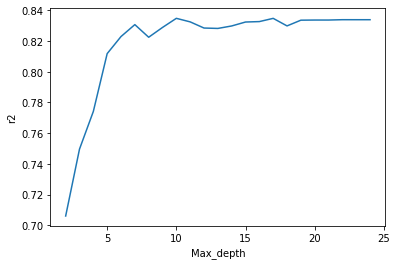

In [153]:
# visualize optimal max depth
plt.plot(max_depth_range, r2)
plt.xlabel('Max_depth')
plt.ylabel('r2');

The optimal max_depth for the RandomForest is 10.

In [158]:
est_range = list(range(2,250))
r2 = []
for est in est_range:
  rand_forest = RandomForestRegressor(n_estimators = est, max_depth = 10, random_state = 42)
  rand_forest.fit(X_train, y_train)
  score = rand_forest.score(X_test, y_test)
  r2.append(score)

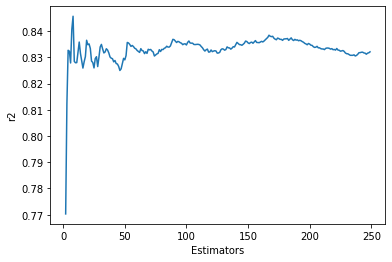

In [159]:
plt.plot(est_range, r2)
plt.xlabel('Estimators')
plt.ylabel('r2');

The optimal n_estimators value is 8.

In [191]:
random_forest = RandomForestRegressor(n_estimators = 8, max_depth = 10, random_state = 42)

In [192]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=8, random_state=42)

In [193]:
optimal_rf_train = random_forest.score(X_train, y_train)
optimal_rf_test = random_forest.score(X_test, y_test)
print('The optimized R2 of the Training set is: ', optimal_rf_train)
print('The optimized R2 of the Test set is: ', optimal_rf_test)

The optimized R2 of the Training set is:  0.960259539838032
The optimized R2 of the Test set is:  0.8457086662635044


We were not able to beat the original model with either bagged trees or a random forest regression.